## Implementing OVA logistic regression for the CIFAR-10 dataset
In this assignment, you will implement a one-vs-all logistic regression classifier, and apply it to a version of the CIFAR-10 object recognition dataset. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

## Load the CIFAR-10 dataset
Open up a terminal window and navigate to the **datasets** folder inside the  **hw3** folder. Run the
**get\_datasets.sh**  script. On my Mac, I just type in **./get\_datasets.sh** at the shell prompt.
A new folder called **cifar\_10\_batches\_py** will be created and it will contain $50000$ labeled
images for training and $10000$ labeled images for testing. The function further partitions the $50000$ training 
images into a train set and a validation set for selection of hyperparameters. We have provided a function to
read this data in **utils.py**. Each image is a $32 \times 32$ array of RGB triples. It is preprocessed by
subtracting the mean image from all images. We flatten each image into a 1-dimensional array of size
3072 (i.e., $32\times 32 \times 3$). Then a 1 is appended to the front of that vector to handle 
the intercept term.  So the training set is a numpy matrix of size $49000\times 3073$, 
the validation set is a matrix of size $1000\times 3073$ and the set-aside test set 
is of size $10000\times 3073$.

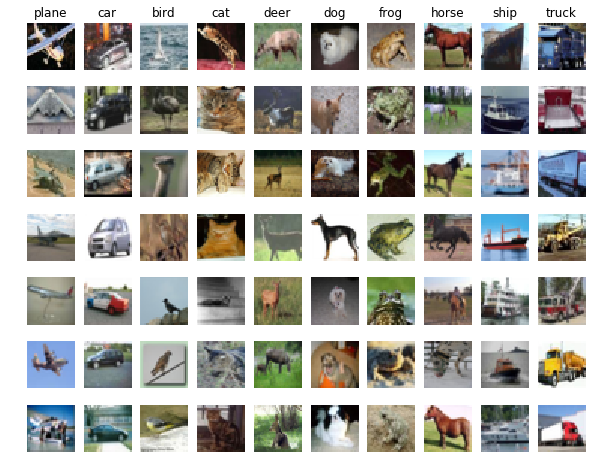

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (10000, 3072)
Training data shape with bias term:  (49000, 3073)
Validation data shape with bias term:  (1000, 3073)
Test data shape with bias term:  (10000, 3073)


In [2]:
import utils

# Get the CIFAR-10 data broken up into train, validation and test sets

X_train, y_train, X_val, y_val, X_test, y_test = utils.get_CIFAR10_data()

## Implementing a one_vs_all classifier for CIFAR-10
In this part of the exercise, you will implement one-vs-all classifier by training multiple regularized binary logistic regression classifiers, one for each of the ten classes in our dataset. You should now complete the code in **one\_vs\_all.py** to train one classifier for each class. In particular, your code should return all the classifier parameters in a matrix $\Theta \in \Re^{(d+1) \times K}$,  where each column of $\Theta$ corresponds to the learned logistic regression parameters for a class. You can do this with a for-loop from $0$ to $K − 1$, training each classifier independently.
When training the classifier for class $k \in \{0, . . . , K − 1\}$, you should build a new label for each example $x$ as follows: label $x$ as 1 if $x$ belomgs to class $k$ and zero otherwise. You can use sklearn's logistic regression function to learn each classifier. 

In [3]:
from one_vs_all import one_vs_allLogisticRegressor

ova_logreg = one_vs_allLogisticRegressor(np.arange(10))

# train 
reg = 1.0
ova_logreg.train(X_train,y_train,reg)

/Users/peiranjin/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [4]:
# predict on test set
y_test_pred = ova_logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
test_accuracy = np.mean(y_test == y_test_pred)
print 'one_vs_all on raw pixels final test set accuracy: %f' % (test_accuracy, )
print confusion_matrix(y_test,y_test_pred)
X = confusion_matrix(y_test,y_test_pred).astype('float')
Y = X/X.sum(axis=1)[:,np.newaxis]
import pandas as pd
Y = pd.DataFrame(Y)
Y.to_csv("confusion_OVA.csv",index=None, header=None)
Y

one_vs_all on raw pixels final test set accuracy: 0.364100
[[458  57  24  25  18  37  29  59 209  84]
 [ 66 460  16  37  22  34  45  52  95 173]
 [115  66 206  79  92  89 144  89  68  52]
 [ 60  89  81 166  45 190 179  49  60  81]
 [ 63  41 100  68 230  82 199 131  35  51]
 [ 55  63  83 121  76 276 116  88  69  53]
 [ 30  52  68  97  84  78 465  49  31  46]
 [ 53  61  52  49  60  86  68 404  51 116]
 [139  77   9  24   6  34  23  21 555 112]
 [ 63 201  10  20  27  29  59  59 111 421]]


,0,1,2,3,4,5,6,7,8,9
0,0.458,0.057,0.024,0.025,0.018,0.037,0.029,0.059,0.209,0.084
1,0.066,0.460,0.016,0.037,0.022,0.034,0.045,0.052,0.095,0.173
2,0.115,0.066,0.206,0.079,0.092,0.089,0.144,0.089,0.068,0.052
3,0.060,0.089,0.081,0.166,0.045,0.190,0.179,0.049,0.060,0.081
4,0.063,0.041,0.100,0.068,0.230,0.082,0.199,0.131,0.035,0.051
5,0.055,0.063,0.083,0.121,0.076,0.276,0.116,0.088,0.069,0.053
6,0.030,0.052,0.068,0.097,0.084,0.078,0.465,0.049,0.031,0.046
7,0.053,0.061,0.052,0.049,0.060,0.086,0.068,0.404,0.051,0.116
8,0.139,0.077,0.009,0.024,0.006,0.034,0.023,0.021,0.555,0.112
9,0.063,0.201,0.010,0.020,0.027,0.029,0.059,0.059,0.111,0.421


## Visualizing the learned one-vs-all classifier

(10, 3072)


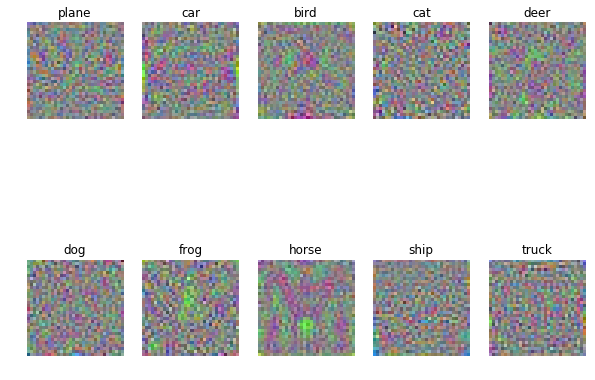

In [5]:
# Visualize the learned weights for each class

theta = ova_logreg.theta[1:,:].T # strip out the bias term
print theta.shape
theta = theta.reshape(10, 32, 32, 3)

theta_min, theta_max = np.min(theta), np.max(theta)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  thetaimg = 255.0 * (theta[i].squeeze() - theta_min) / (theta_max - theta_min)
  plt.imshow(thetaimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])

plt.savefig('p6_OVA.pdf')
plt.show()


## Comparing your functions with sklearn's

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import linear_model

# train on train set with reg
sklearn_ova = OneVsRestClassifier(linear_model.LogisticRegression(C=1.0/reg,penalty='l2',
                                                                  fit_intercept=False,solver='lbfgs'))
sklearn_ova.fit(X_train, y_train)     

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [7]:
# predict on test set
y_test_pred_sk = sklearn_ova.predict(X_test)

sk_test_accuracy = np.mean(y_test == y_test_pred_sk)
print 'one_vs_all on raw pixels final test set accuracy (sklearn): %f' % (sk_test_accuracy, )
print confusion_matrix(y_test,y_test_pred_sk)                             

one_vs_all on raw pixels final test set accuracy (sklearn): 0.364100
[[458  57  24  25  18  37  29  59 209  84]
 [ 66 460  16  37  22  34  45  52  95 173]
 [115  66 206  79  92  89 144  89  68  52]
 [ 60  89  81 166  45 190 179  49  60  81]
 [ 63  41 100  68 230  82 199 131  35  51]
 [ 55  63  83 121  76 276 116  88  69  53]
 [ 30  52  68  97  84  78 465  49  31  46]
 [ 53  61  52  49  60  86  68 404  51 116]
 [139  77   9  24   6  34  23  21 555 112]
 [ 63 201  10  20  27  29  59  59 111 421]]


## Visualizing the sklearn OVA classifier

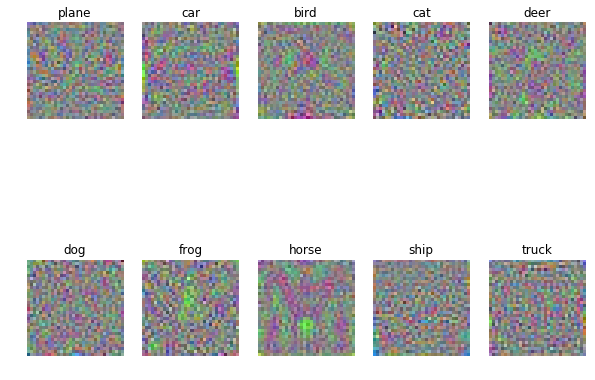

In [8]:
# Visualize the learned weights for each class

theta = sklearn_ova.coef_[:,1:] # strip out the bias term
theta = theta.reshape(10, 32, 32, 3)

theta_min, theta_max = np.min(theta), np.max(theta)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  thetaimg = 255.0 * (theta[i].squeeze() - theta_min) / (theta_max - theta_min)
  plt.imshow(thetaimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])

plt.savefig('p6_sklearn.pdf')
plt.show()